## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

## Data Understanding

This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

#### Importing the libraries.

In [323]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [324]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import itertools 
%matplotlib inline
import plotly
from plotly import tools

#### Importing the data

In [325]:
#read the data set of "application_data" in app and "previous_application" in pre_app.
app = pd.read_csv("application_data.csv")
pre_app = pd.read_csv("previous_application.csv")

## Data Cleaning

In [326]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [327]:
app.shape

(307511, 122)

In [328]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [329]:
#calculate the percentage of missing values in all columns and viewing top 50 columns
(app.isnull().sum()/len(app)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

#### Removing columns with missing values more than 40%

As per Industrial Standards, Threshold limit of the missing values can be between 40% to 50 % depending upon the data acquired for a specific sector.

In [330]:
#Keep columns which have atleast 60% not null values and drop others (in other words, taking threshold of missing values as 40%) 
app = app.dropna(thresh=len(app)*0.6, axis='columns')

In [331]:
app.shape

(307511, 73)

###  Suggestions for handling MISSING values

In [332]:
#calculate the percentage of missing values again and viewing top 15 columns
(app.isnull().sum()/len(app)*100).sort_values(ascending = False).head(15)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
dtype: float64

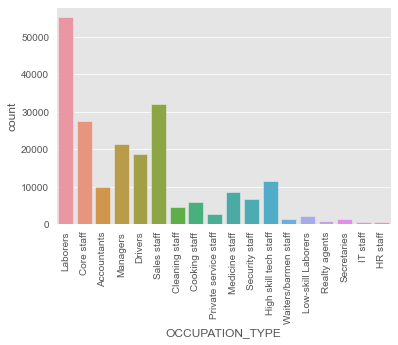

In [333]:
sns.countplot(x= 'OCCUPATION_TYPE', data=app)
plt.xticks(rotation=90)
plt.show()

In [334]:
app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

###### SUGGESTION 1 - Missing values in OCCUPATION_TYPE  can be replaced with the most frequently occurring value/ mode i.e. "Laborers" in this case

In [335]:
app['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

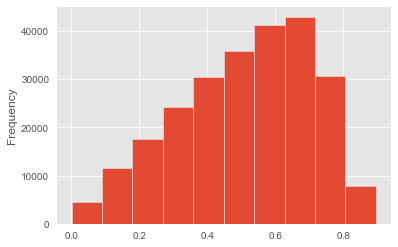

In [336]:
app['EXT_SOURCE_3'].plot.hist()
plt.show()

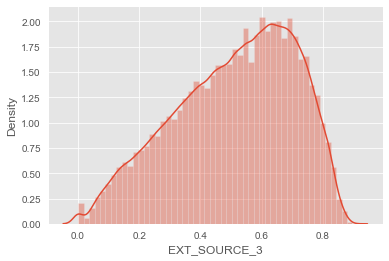

In [337]:
sns.distplot(app['EXT_SOURCE_3'])
plt.show()

In [338]:
app['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

###### SUGGESTION 2 - Since the distribution for  'EXT_SOURCE_3' is skewed, we can use the Median for imputing Missing Values

In [339]:
app.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

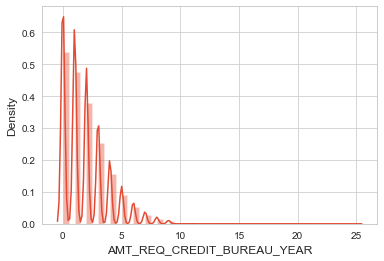

In [340]:
sns.set_style('whitegrid') 
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [341]:
app.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

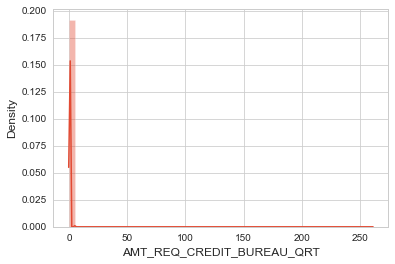

In [342]:
sns.set_style('whitegrid') 
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

In [343]:
app.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

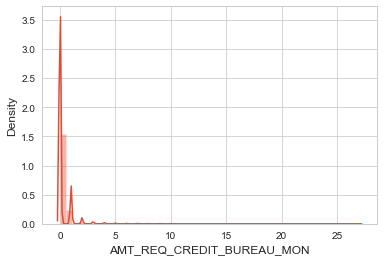

In [344]:
sns.set_style('whitegrid') 
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

In [345]:
app.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

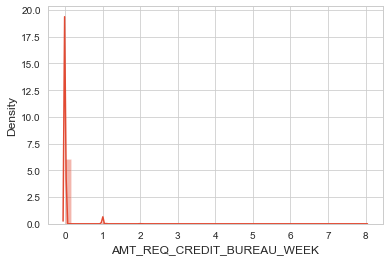

In [346]:
sns.set_style('whitegrid') 
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

In [347]:
app.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

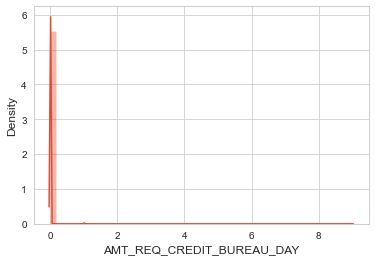

In [348]:
sns.set_style('whitegrid')
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [349]:
app.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

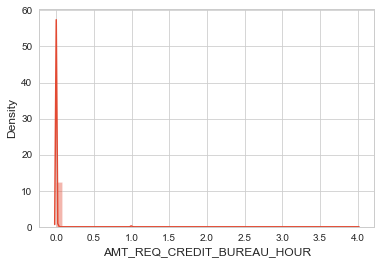

In [350]:
sns.set_style('whitegrid') 
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

###### SUGGESTION 3 - For below columns impute missing values with median since the distribution is skewed  :

AMT_REQ_CREDIT_BUREAU_YEAR   
AMT_REQ_CREDIT_BUREAU_QRT     
AMT_REQ_CREDIT_BUREAU_MON    
AMT_REQ_CREDIT_BUREAU_WEEK    
AMT_REQ_CREDIT_BUREAU_DAY     
AMT_REQ_CREDIT_BUREAU_HOUR

In [351]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

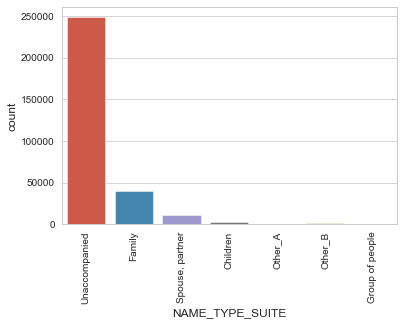

In [352]:
sns.countplot(x= 'NAME_TYPE_SUITE', data=app)
plt.xticks(rotation=90)
plt.show()

###### SUGGESTION 4 - Missing values in NAME_TYPE_SUITE  can be replaced with the most frequently occurring value/ mode i.e. "Unaccompanied" in this case

In [353]:
app['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

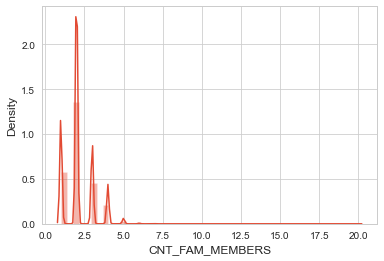

In [354]:
sns.set_style('whitegrid') 
sns.distplot(app['CNT_FAM_MEMBERS']) 
plt.show()

###### SUGGESTION 5 - Since the distribution for 'CNT_FAM_MEMBERS' is skewed, we can use the Median for imputing Missing Values

In [355]:
app['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

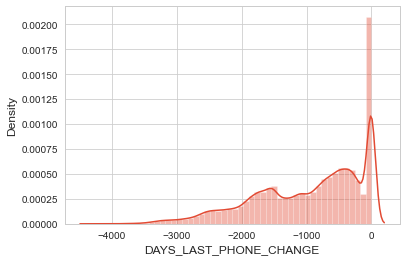

In [356]:
sns.set_style('whitegrid') 
sns.distplot(app['DAYS_LAST_PHONE_CHANGE']) 
plt.show()

###### SUGGESTION 5 - We can use the Mode for imputing Missing Values as the most frequently occuring value is Zero.

In [357]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [358]:
app.DAYS_BIRTH.head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [359]:
app.DAYS_EMPLOYED.head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [360]:
app.DAYS_REGISTRATION.head()

0   -3648.0
1   -1186.0
2   -4260.0
3   -9833.0
4   -4311.0
Name: DAYS_REGISTRATION, dtype: float64

In [361]:
app.DAYS_ID_PUBLISH.head()

0   -2120
1    -291
2   -2531
3   -2437
4   -3458
Name: DAYS_ID_PUBLISH, dtype: int64

In [362]:
app.DAYS_LAST_PHONE_CHANGE.head()

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

###### Handling Errors in Data - Imputing absolute values for columns containing "Days" in negative

In [363]:
app['DAYS_BIRTH'] = abs(app['DAYS_BIRTH'])
app['DAYS_EMPLOYED'] = abs(app['DAYS_EMPLOYED'])
app['DAYS_REGISTRATION'] = abs(app['DAYS_REGISTRATION'])
app['DAYS_ID_PUBLISH'] = abs(app['DAYS_ID_PUBLISH'])
app['DAYS_LAST_PHONE_CHANGE'] = abs(app['DAYS_LAST_PHONE_CHANGE'])

#### Converting "Days" into "Years"

In [364]:
app['AGE']= (app['DAYS_BIRTH']/365).astype(int)

In [365]:
app.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [366]:
app.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [367]:
app.DAYS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
230         151
199         151
          ...  
13961         1
11827         1
10176         1
9459          1
8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [368]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
0                        0.0                         1.0   25  
1                        0.0                         0.0   45  
2                        0.0                         0.0   52  
3                        NaN                         NaN   52  
4                        0.0                         0.0   54  

[5 rows x 74 columns]

In [369]:
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

In [370]:
# Replacing XNA value with F
app.loc[app.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### The value '365243' in column 'DAYS_EMPLOYED' indicates the missing values, replacing it with NaN

In [371]:
app.loc[app.DAYS_EMPLOYED == 365243,'DAYS_EMPLOYED'] = np.NaN
app.DAYS_EMPLOYED.value_counts()

200.0      156
224.0      152
199.0      151
230.0      151
212.0      150
          ... 
13961.0      1
11827.0      1
10176.0      1
9459.0       1
8694.0       1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [372]:
app.DAYS_EMPLOYED.describe()

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

#### Below we can reconfirm that the 55374 values in 'DAYS_EMPLOYED' with value '365243' were actually null as their 'ORGANIZATION_TYPE'  is 'XNA'. Replacing the 'XNA' with NaN as well.

In [373]:
app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [374]:
app.loc[app.ORGANIZATION_TYPE == 'XNA','ORGANIZATION_TYPE'] = np.NaN

In [375]:
app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [376]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
app['AMT_INCOME_RANGE'] = pd.qcut(app.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app['AMT_INCOME_RANGE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [377]:
# Binning 'AGE' 
app['AGE_GROUP'] = pd.cut(app.AGE, [18, 29, 39, 49, 59, 100], labels=['18-29', '30-39', '40-49', '50-59', '60+'])
app['AGE_GROUP'].head(11)

0     18-29
1     40-49
2     50-59
3     50-59
4     50-59
5     40-49
6     30-39
7     50-59
8     50-59
9     30-39
10    18-29
Name: AGE_GROUP, dtype: category
Categories (5, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60+']

## Finding Outliers

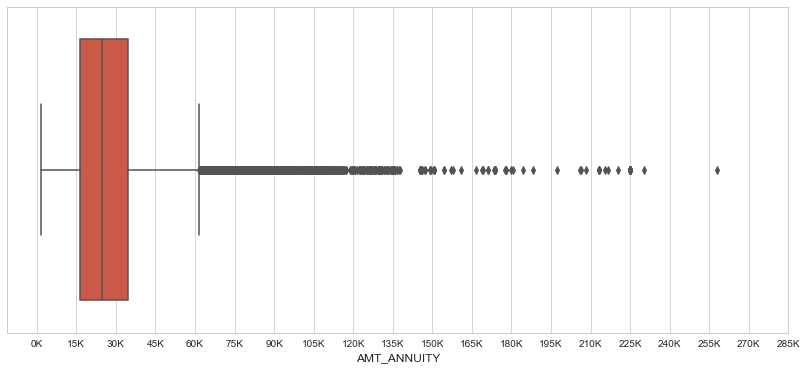

In [378]:
plt.figure(figsize = [14,6])
sns.boxplot(app.AMT_ANNUITY)
ticks = np.arange(0, 290000, 15000)
labels = ["{}K".format(i//1000) for i in ticks]
plt.xticks(ticks, labels)
plt.show()

#### Observation - Outlier near 255K for AMT_ANNUITY

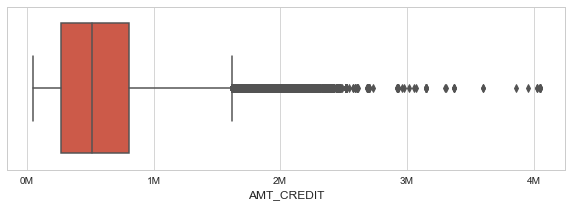

In [379]:
plt.figure(figsize = [10,3])
sns.boxplot(app.AMT_CREDIT)
ticks = np.arange(0, 5000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.xticks(ticks, labels)
plt.show()

#### Observation - Outlier close to 4M for AMT_CREDIT

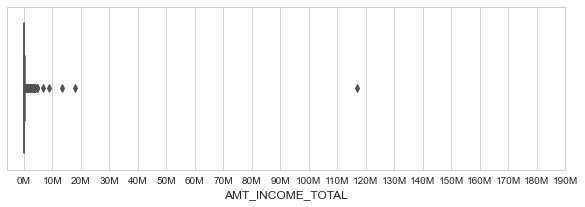

In [380]:
plt.figure(figsize = [10,3])
sns.boxplot(app.AMT_INCOME_TOTAL)

ticks = np.arange(0, 200000000, 10000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.xticks(ticks, labels)
plt.show()

#### Observation - Outlier close to 118M for AMT_INCOME_TOTAL

## Analysis on Application Data Set

In [381]:
app.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

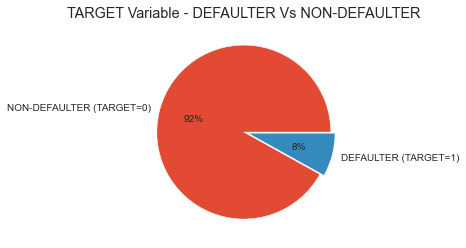

In [382]:
plt.pie(app['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULTER (TARGET=0)','DEFAULTER (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NON-DEFAULTER')
plt.show()

In [383]:
app_t0 = app.loc[app['TARGET'] == 0] # Non Defaulters
app_t1 = app.loc[app['TARGET'] == 1] # Defaulters

In [384]:
## Numerical Columns
app.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [385]:
## Catergorical Columns
app.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

### Distribution of contract type, gender, own car, own house with respect to Target variable

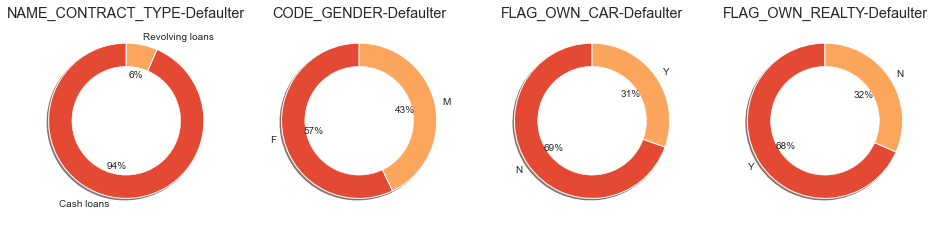

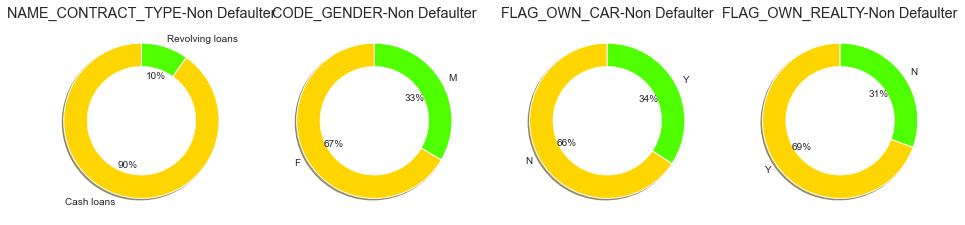

In [386]:
d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,8))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    app_t1[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("RdYlGn"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,8))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    app_t0[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("hsv"),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Non Defaulter")

#### Observation 1 : Cash Loans are preferred over Revolving Loans by both Defaulters and Non Defaulters
#### Observation 2 : Female are the major Defaulters as well as Non Defaulters. We see more female applying for loans than males (ref . Observation 4 below) and hence more number of female defaulters. However, the rate of defaulting of FEMALE is much lower compared to their MALE counterparts
#### Observartion 3 : Defaulters are less likely to own a car than Non Defaulters.

### Distribution of ORGANZATION_TYPE & OCCUPATION_TYPE with respect to TARGET VARIABLE

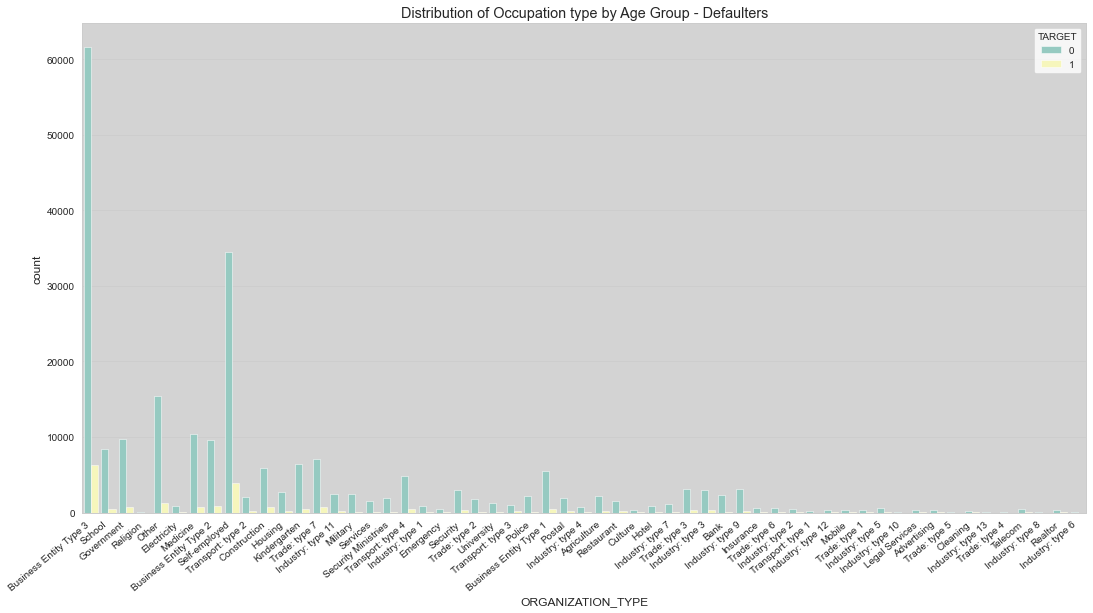

In [387]:
fig  = plt.figure(figsize=(18,9))

ax = sns.countplot("ORGANIZATION_TYPE",hue="TARGET",data =app,palette="Set3")
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Occupation type by Age Group - Defaulters")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

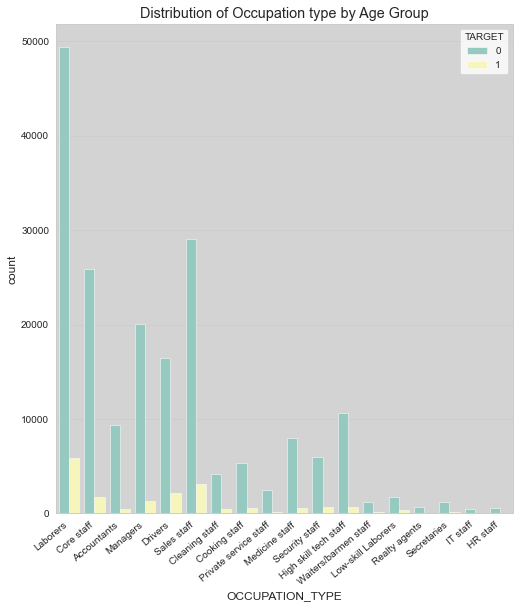

In [388]:
fig  = plt.figure(figsize=(18,9))
plt.subplot(121)
ax = sns.countplot("OCCUPATION_TYPE",hue="TARGET",data =app,palette="Set3")
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Occupation type by Age Group")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

#### Observation 4 - Laborers and Sales Staff in "OCCUPATION_TYPE" & Business Enity 3 and Self Employed in "ORGANIZATION_TYPE" take more loans, hence top in defaulters as well. 

### Distribution of Number of children and family members of client by repayment status

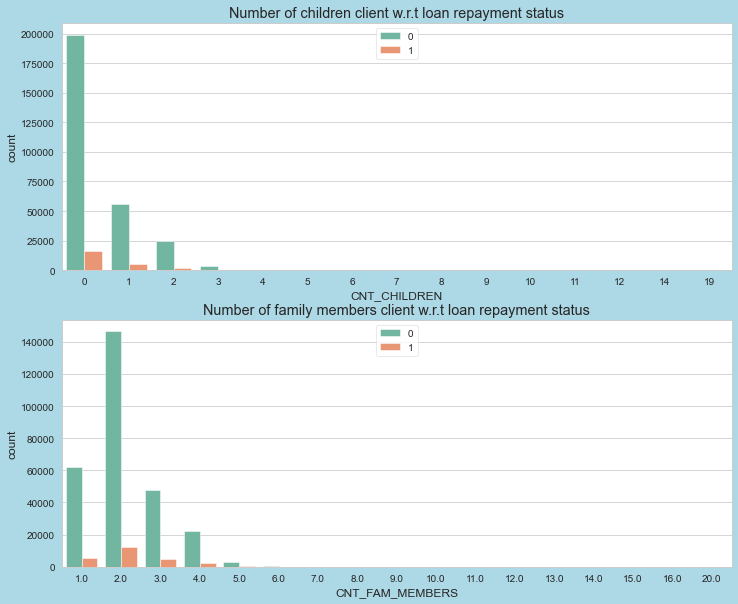

In [389]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(app["CNT_CHILDREN"],palette="Set2",hue=app["TARGET"])
plt.legend(loc="upper center")
plt.title("Number of children client w.r.t loan repayment status")
plt.subplot(212)
sns.countplot(app["CNT_FAM_MEMBERS"],palette="Set2",hue=app["TARGET"])
plt.legend(loc="upper center")
plt.title("Number of family members client w.r.t loan repayment status")
fig.set_facecolor("lightblue")

#### Observation 5 - Defaulters have less family members/children as compared to Non Defaulters

### Distribution of Education Type & Income Type with respect to Target 1 (Loan Payment Difficulty)

In [431]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()
def biplot(df,feature,title):
    temp = df[feature].value_counts()
    
    # Calculate the percentage of target=1 per category value
    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    perc.sort_values(by='TARGET', ascending=False, inplace=True)

    fig = make_subplots(rows=1, cols=2,subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))


    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=400, width=900, title_text=title, showlegend=False)
    fig.show()

In [429]:
biplot(app ,'NAME_INCOME_TYPE','Income type')

In [430]:
biplot(app ,'NAME_EDUCATION_TYPE','Education type')

#### Observation 6 - People with Income Type "Maternity Leave" & "Unemployed" and Education Type "Lower Secondary", "Incomplete Higher" have loan payment difficulties

### Distribution of Family Status, Housing Type, Age Group, Income Range, Region Rating & Income Type of client with respect to Target Variable

In [393]:
def plotapp(var):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
    
    sns.countplot(x=var, data=app_t0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(app_t0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=app_t1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app_t1))*100), (p.get_x()+0.1, p.get_height()+50))
        
    plt.tight_layout()
    
    plt.show()

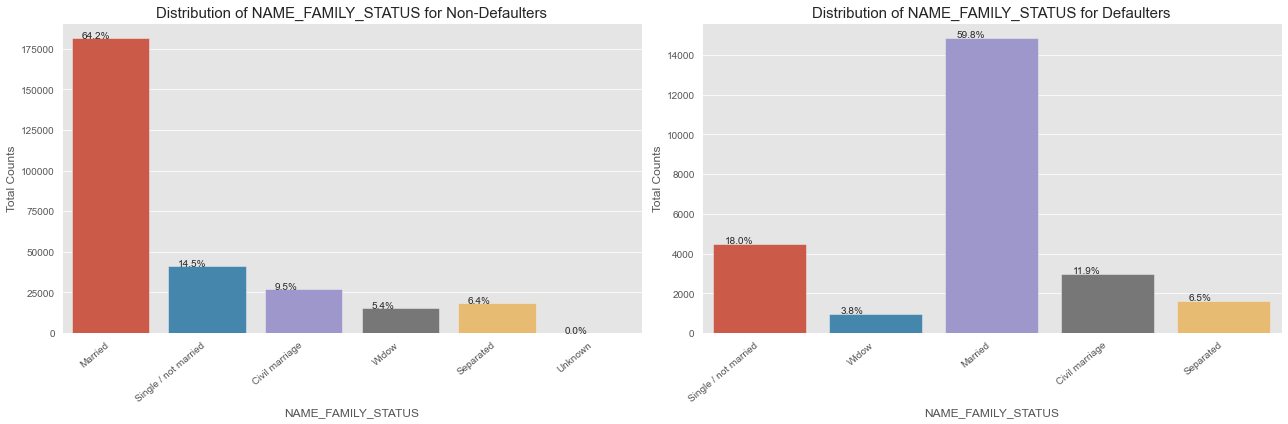

In [394]:
plotapp('NAME_FAMILY_STATUS')

#### Observation 7 -  People with family status as "Single/Not Married" & "Civil Marriage" default more as compared to others. Married/Widow people clearly deafult less as compared to others.

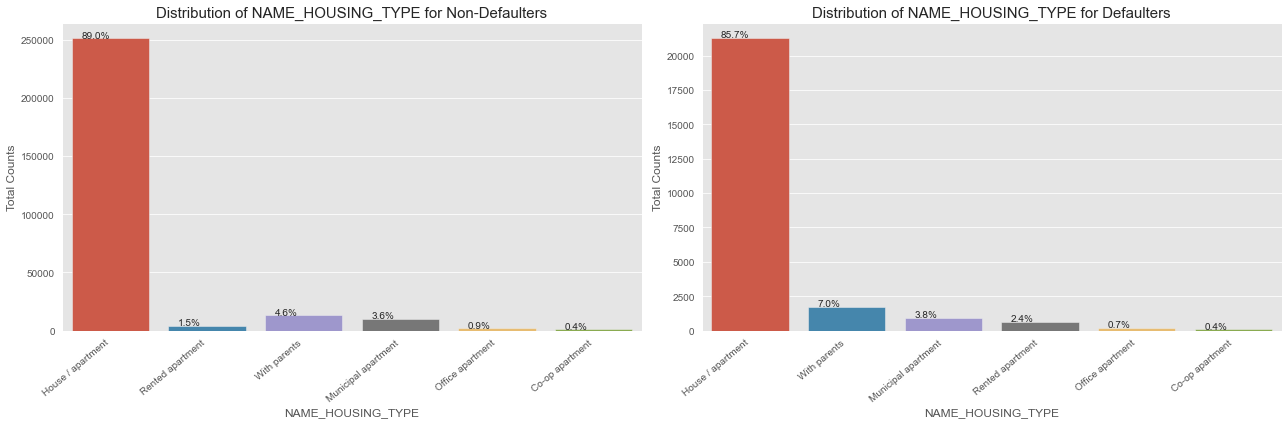

In [395]:
plotapp('NAME_HOUSING_TYPE')

#### Observation 8 -  People with housing type as "With Parents" default more as compared to others. 

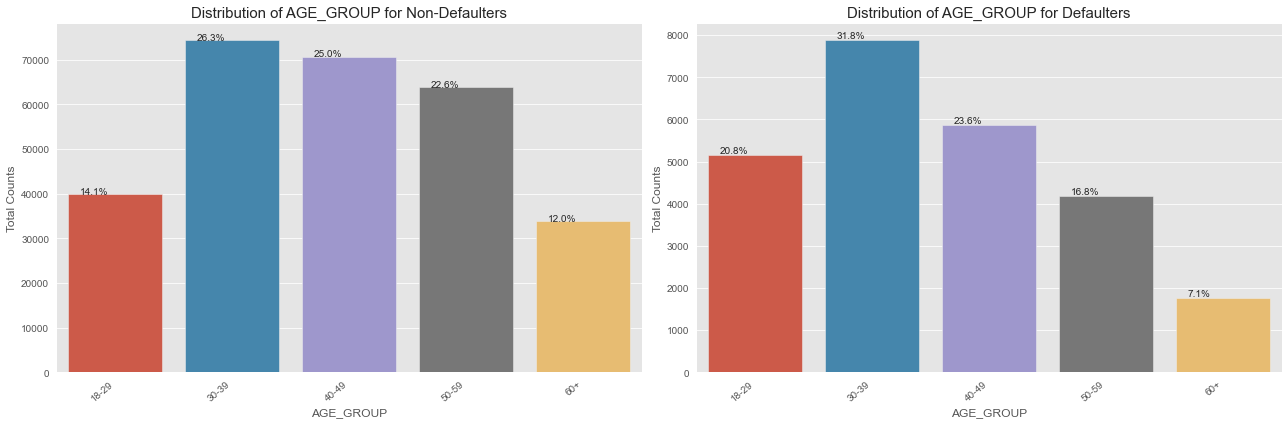

In [396]:
plotapp('AGE_GROUP')

#### Observation 9 -  People under the age group "18-29" & "30-39" default more as compared to others. As the age crosses 39, the person is less likely to default.

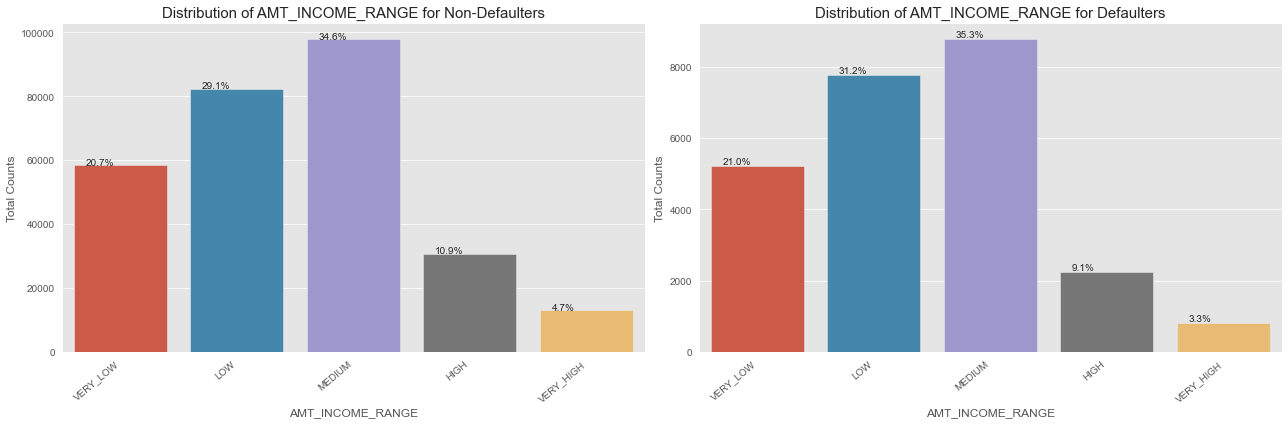

In [397]:
plotapp('AMT_INCOME_RANGE')

#### Observation 10 -  People with Income Range "Low" & "Medium" default more as compared to others.

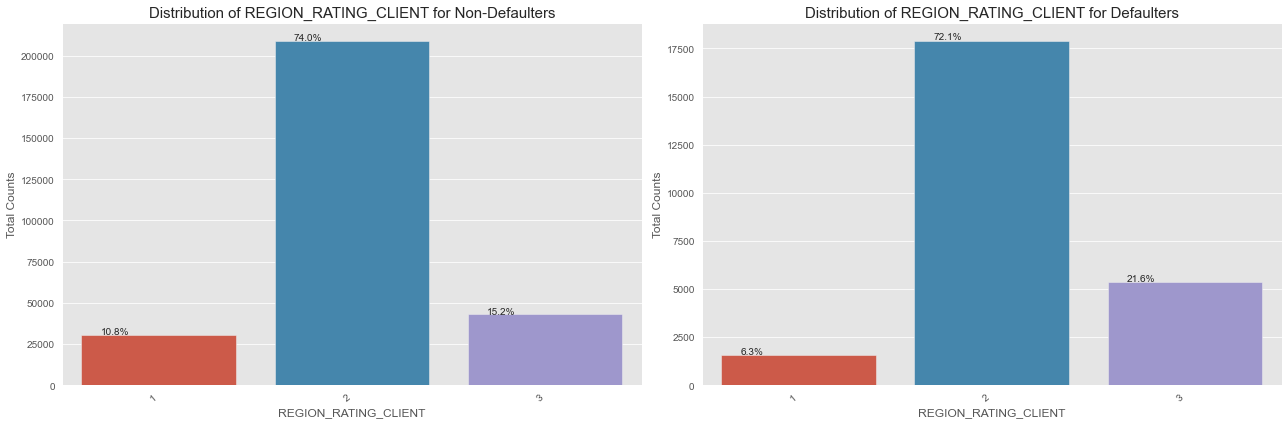

In [398]:
plotapp('REGION_RATING_CLIENT')

#### Observation 11 - While people with Region Rating 2 apply for more loans hence contributing most of the defaulters, people from Region Rating 3 clearly defaulters despite their low loan applying percentage.

### REGION_POPULATION_RELATIVE vs NAME_CONTRACT_TYPE for Target variable 0 & 1

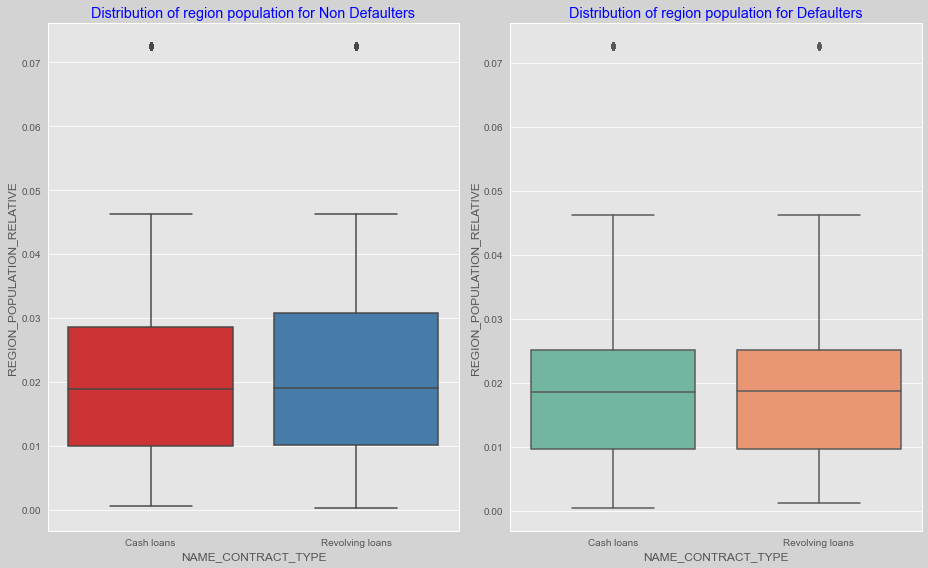

In [399]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.boxplot(y=app_t0["REGION_POPULATION_RELATIVE"]
               ,x=app_t0["NAME_CONTRACT_TYPE"],
               palette="Set1")
plt.title("Distribution of region population for Non Defaulters",color="b")
plt.subplot(122)
sns.boxplot(y = app_t1["REGION_POPULATION_RELATIVE"]
               ,x=app_t1["NAME_CONTRACT_TYPE"]
               ,palette="Set2")
plt.title("Distribution of region population for Defaulters",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")
plt.tight_layout()
plt.show()

#### Observation 12 - Loans are taken by people from regions where population density is less

#####  DAYS_LAST_PHONE_CHANGE vs TARGET

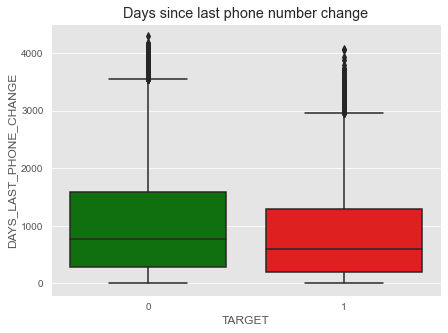

In [400]:
plt.figure(figsize=(7,5))
sns.boxplot(app["TARGET"],
                 app["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
plt.title("Days since last phone number change")
plt.show()

#### Observation 13 - Defaulters are more likely to have changed their phone number recently

### Distribution of two variables from Application Data

In [401]:
def plottwo(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    app[col].value_counts(normalize=True).plot.pie(fontsize=15, autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)

    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((app_t0[col].value_counts())/len(app_t0))
    df['1']= ((app_t1[col].value_counts())/len(app_t1))
    df.plot.bar(ax=ax2)
    plt.xticks(rotation=45)
    plt.title('Plotting data for target in terms of total count')

    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=app_t0, ax = ax3)
    plt.xticks(rotation=45)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=app_t1, ax = ax4)
    plt.xticks(rotation=45)
    plt.title('Plotting data for Target=1 in terms of percentage')

    plt.tight_layout()

    plt.show()

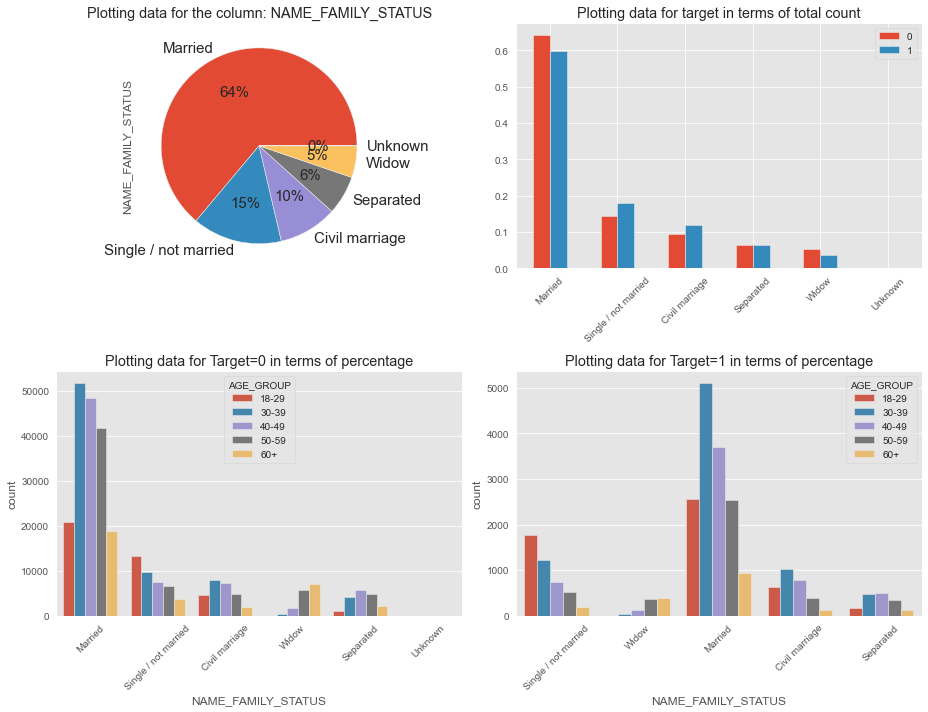

In [402]:
plottwo('NAME_FAMILY_STATUS','AGE_GROUP')

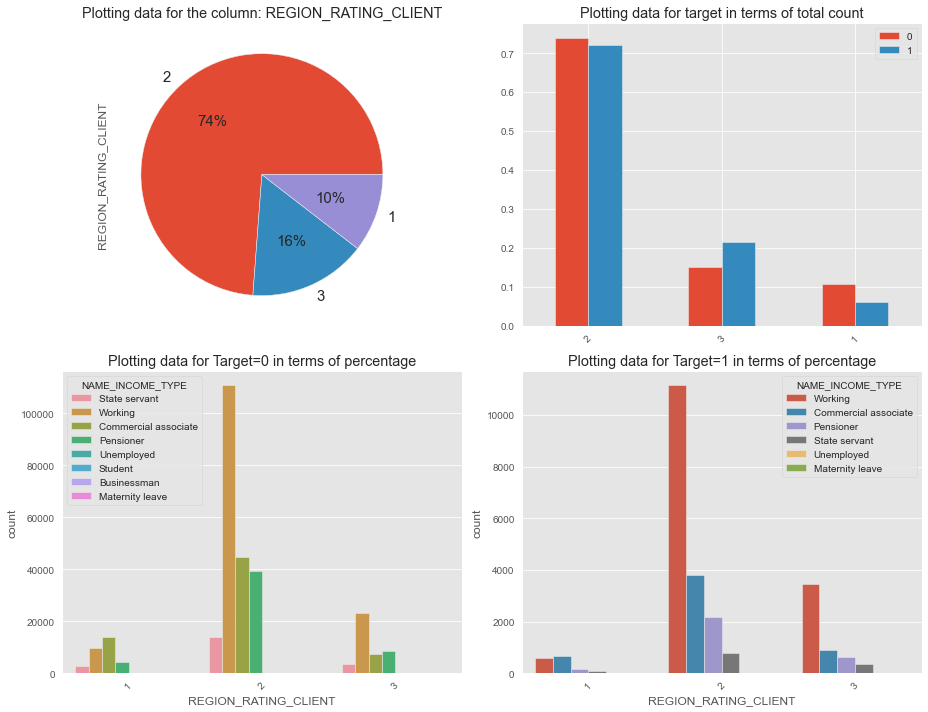

In [403]:
plottwo('REGION_RATING_CLIENT', 'NAME_INCOME_TYPE')

## Analysis on Previous Application Data Set

### Distribution of Current Approved loan having previous loan applications

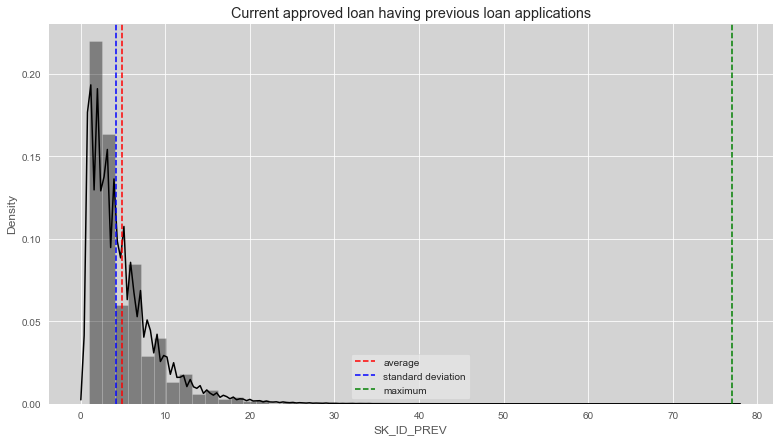

In [404]:
x = pre_app.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="black")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current approved loan having previous loan applications")
ax.set_facecolor("lightgrey")

#### Observation 14 - Currently approved loan applications had approximately 4 previous loan applications

### Distribution of NAME_CONTRACT_TYPE

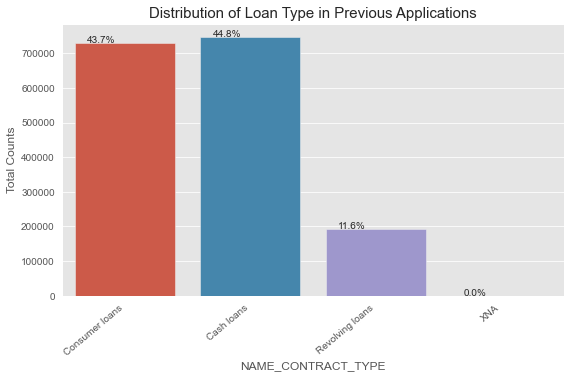

In [405]:

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1) = plt.subplots(figsize=(9,5))
    
    sns.countplot(x="NAME_CONTRACT_TYPE", data=pre_app,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of Loan Type in Previous Applications',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(pre_app))*100), (p.get_x()+0.1, p.get_height()+50))
        
    
    plt.show()

#### Observation 15 - Previous loan applications had a huge number of Consumer loans applications as well

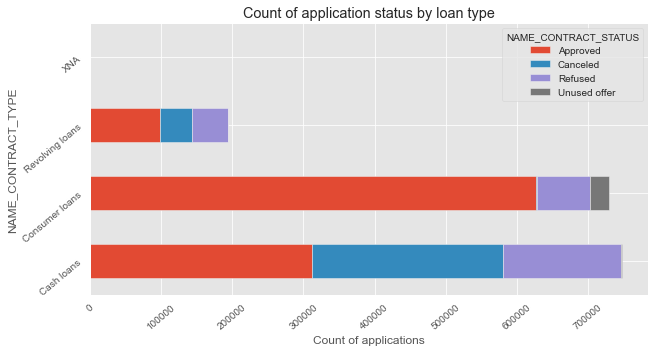

In [406]:
plt.subax = pd.crosstab(pre_app["NAME_CONTRACT_TYPE"],pre_app["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,5),stacked=True)
plt.xticks(rotation = 40)
plt.xlabel("Count of applications")
plt.yticks(rotation = 40)
plt.title("Count of application status by loan type")
ax.set_facecolor("k")
plt.show()

#### Observation 16 - Cash Loans had maximum number of "Cancelled" & "Refused" requests.

### Distribution of Loan Status based on Loan Purpose

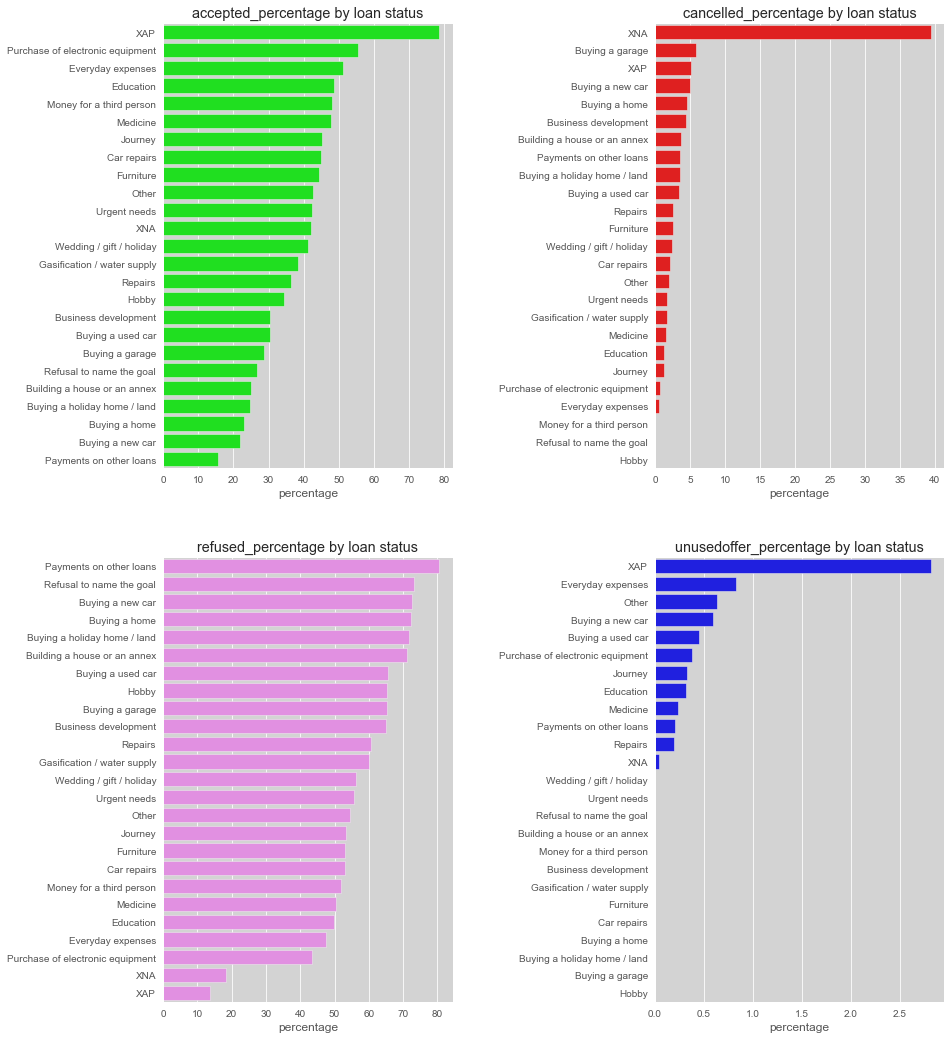

In [407]:
pre_app[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
sts = pd.crosstab(pre_app["NAME_CASH_LOAN_PURPOSE"],pre_app["NAME_CONTRACT_STATUS"])
sts["a"] = (sts["Approved"]*100)/(sts["Approved"]+sts["Canceled"]+sts["Refused"]+sts["Unused offer"])
sts["c"] = (sts["Canceled"]*100)/(sts["Approved"]+sts["Canceled"]+sts["Refused"]+sts["Unused offer"])
sts["r"] = (sts["Refused"]*100)/(sts["Approved"]+sts["Canceled"]+sts["Refused"]+sts["Unused offer"])
sts["u"] = (sts["Unused offer"]*100)/(sts["Approved"]+sts["Canceled"]+sts["Refused"]+sts["Unused offer"])
sts_new = sts[["a","c","r","u"]]
sts_new = sts_new.stack().reset_index()
sts_new["NAME_CONTRACT_STATUS"] = sts_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unusedoffer_percentage"})

lst = sts_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","r","violet","b"]

fig = plt.figure(figsize=(14,18))

for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = sts_new[sts_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by loan status")
    plt.subplots_adjust(wspace = .7)
    ax.set_facecolor("lightgrey")

#### Observation 17 - Loan purpose like XAP , purchasing electronic eqipment ,every day expenses and education have maximum loan acceptance. Loan puposes like payment of other loans ,refusal to name goal ,buying new home or car have most refusals. 40% of XNA purpose loans are cancelled.

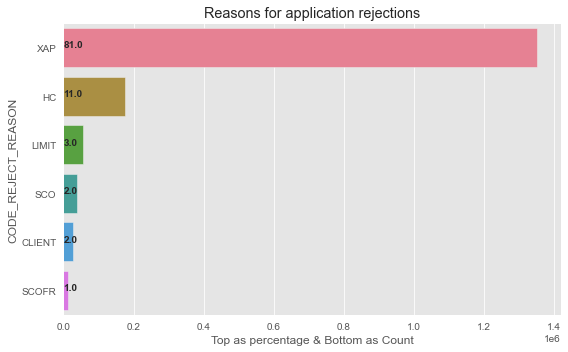

In [408]:
plt.figure(figsize=(8,5))
rej = pre_app["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")
plt.tight_layout()
plt.show()


#### Observation 18 - Application rejection reason is XAP for 81% of the refused cases. Though it is unclear what XAP means.

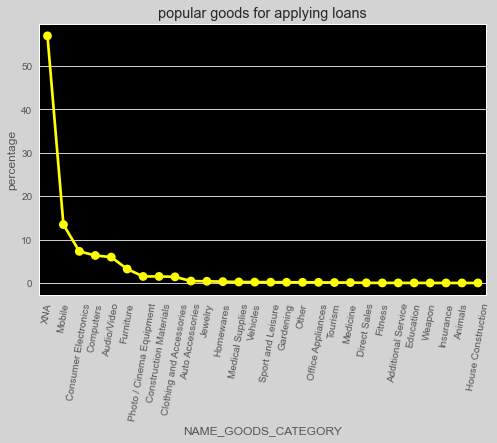

In [409]:
goods = pre_app["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(8,5))
ax = sns.pointplot("index","percentage",data=goods,color="yellow")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('lightgrey')

#### Observation 19 - XNA, Mobiles, Consumer Electronics and Computers are popular goods category for applying loans

## Correlation w.r.t Target Variable - Application Data

### Finding Correlation for Application Data Sub set with Target = 0 (app_t0)

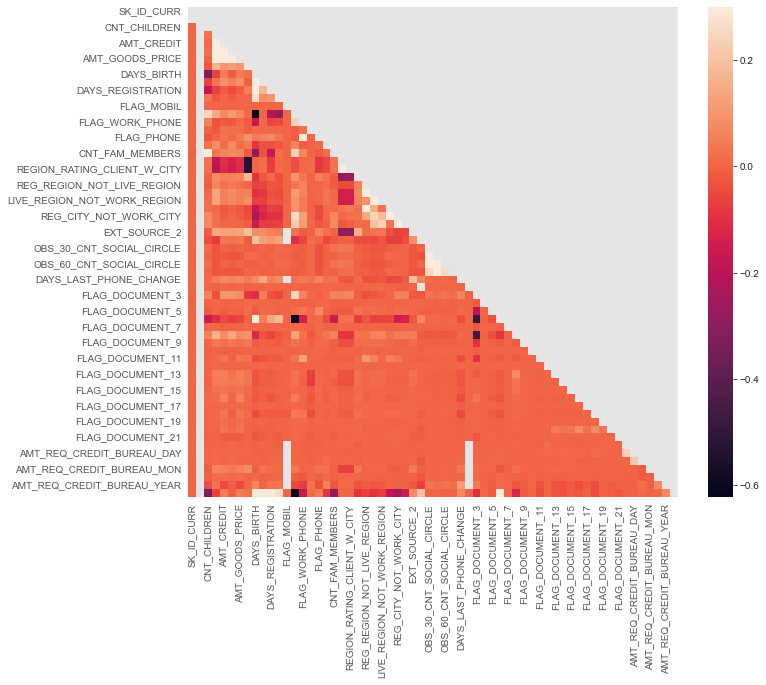

In [410]:
corr0 = app_t0.corr()
msk = np.zeros_like(corr0)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr0, mask=msk, vmax=0.3, square=True)
    plt.show()

In [411]:
corr_0 = app_t0.corr().abs().unstack().sort_values().dropna()
corr_0 = corr_0[corr_0 != 1.0]
corr_0

AGE                       FLAG_DOCUMENT_10            4.838028e-07
FLAG_DOCUMENT_10          AGE                         4.838028e-07
EXT_SOURCE_2              FLAG_DOCUMENT_2             3.976804e-06
FLAG_DOCUMENT_2           EXT_SOURCE_2                3.976804e-06
SK_ID_CURR                DAYS_EMPLOYED               4.947514e-06
                                                          ...     
AMT_GOODS_PRICE           AMT_CREDIT                  9.872505e-01
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    9.985085e-01
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    9.985085e-01
AGE                       DAYS_BIRTH                  9.997110e-01
DAYS_BIRTH                AGE                         9.997110e-01
Length: 3628, dtype: float64

### Top 10 Correlation for Target = 0 (Non Defaulters)

In [412]:
corr_0.tail(30)

REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537301
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY    0.537301
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE     0.539005
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT           0.539005
FLAG_EMP_PHONE               FLAG_DOCUMENT_6                0.596060
FLAG_DOCUMENT_6              FLAG_EMP_PHONE                 0.596060
FLAG_EMP_PHONE               AGE                            0.621989
AGE                          FLAG_EMP_PHONE                 0.621989
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.622073
FLAG_EMP_PHONE               DAYS_BIRTH                     0.622073
AMT_CREDIT                   AMT_ANNUITY                    0.771309
AMT_ANNUITY                  AMT_CREDIT                     0.771309
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776686
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776686
REG_CITY_NOT_WORK_CITY       LIVE_

### Finding Correlation for Application Data Sub set with Target = 1 (app_t1)

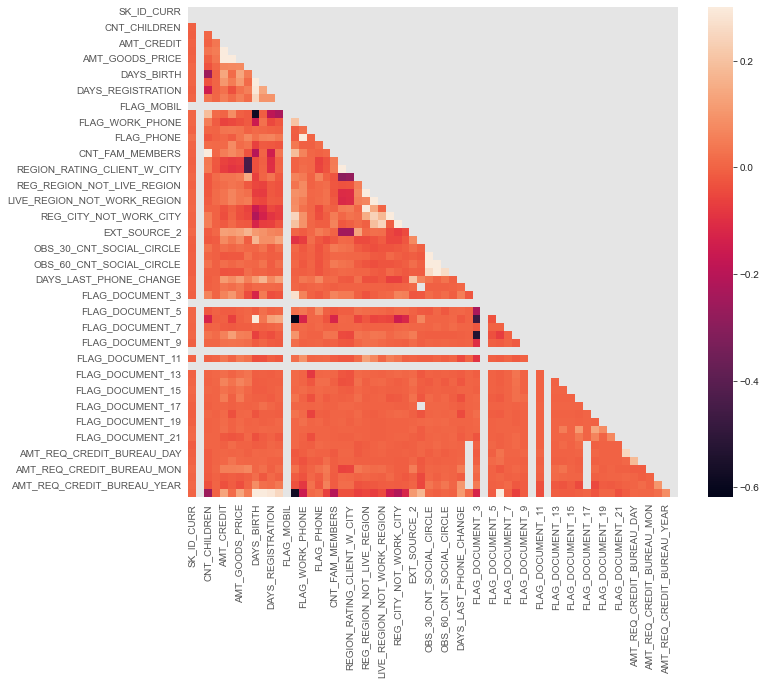

In [413]:
corr1 = app_t1.corr()
msk = np.zeros_like(corr1)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr1, mask=msk, vmax=0.3, square=True)
    
    plt.show()

In [414]:
corr_1 = app_t1.corr().abs().unstack().sort_values().dropna()
corr_1 = corr_1[corr_1 != 1.0]
corr_1

FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000010
REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000010
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_WEEK     0.000018
                                                              ...   
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
DAYS_BIRTH                   AGE                            0.999691
AGE                          DAYS_BIRTH                     0.999691
Length: 3164, dtype: float64

### Top 10 Correlation for Target = 1 (Defaulters)

In [415]:
corr_1.tail(30)

REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.497937
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.497937
FLAG_DOCUMENT_8              FLAG_DOCUMENT_3                0.528927
FLAG_DOCUMENT_3              FLAG_DOCUMENT_8                0.528927
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.578519
FLAG_EMP_PHONE               DAYS_BIRTH                     0.578519
AGE                          FLAG_EMP_PHONE                 0.578783
FLAG_EMP_PHONE               AGE                            0.578783
                             FLAG_DOCUMENT_6                0.617421
FLAG_DOCUMENT_6              FLAG_EMP_PHONE                 0.617421
AMT_CREDIT                   AMT_ANNUITY                    0.752195
AMT_ANNUITY                  AMT_CREDIT                     0.752195
                             AMT_GOODS_PRICE                0.752699
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752699
REG_CITY_NOT_WORK_CITY       LIVE_

## Correlation w.r.t Target Variable -  Application & Previous Application Data Combined

In [416]:
combined_app= pd.merge(app, pre_app, on='SK_ID_CURR', how='inner')
combined_app.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
combined_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
3        35698.5  ...  Consumer electronics        12.0           middle   
2        35698.5  ...             Furniture         6.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
3  POS household with interest           365243.0        -2310.0   
2   POS industry with interest           365243.0         -797.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
3                    -1980.0        -1980.0           -1976.0   
2                     -647.0         -647.0            -639.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
3                        1.0  
2                        0.0  
4                        0.0  

[5 rows x 112 columns]

In [417]:
combined_app_t0 = combined_app[combined_app['TARGET'] == 0]
combined_app_t1 = combined_app[combined_app['TARGET'] == 1]

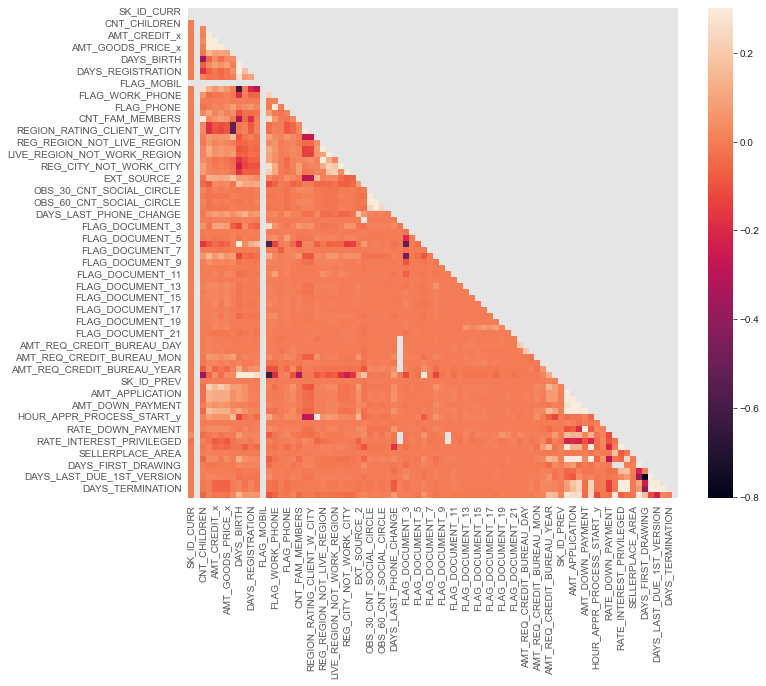

In [418]:
comcorr0 = combined_app_t0.corr()
msk = np.zeros_like(comcorr0)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(comcorr0, mask=msk, vmax=0.3, square=True)
    
    plt.show()

In [419]:
Com_corr_0 = combined_app_t0.corr().abs().unstack().sort_values().dropna()
Com_corr_0 = Com_corr_0[Com_corr_0 != 1.0]
Com_corr_0.tail(30)

AMT_APPLICATION              AMT_ANNUITY_y                  0.809023
AMT_ANNUITY_y                AMT_APPLICATION                0.809023
                             AMT_CREDIT_y                   0.816541
AMT_CREDIT_y                 AMT_ANNUITY_y                  0.816541
AMT_GOODS_PRICE_y            AMT_ANNUITY_y                  0.821027
AMT_ANNUITY_y                AMT_GOODS_PRICE_y              0.821027
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.835641
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.835641
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.863099
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.863099
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.875761
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.875761
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878475
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878475
DAYS_LAST_DUE                DAYS_

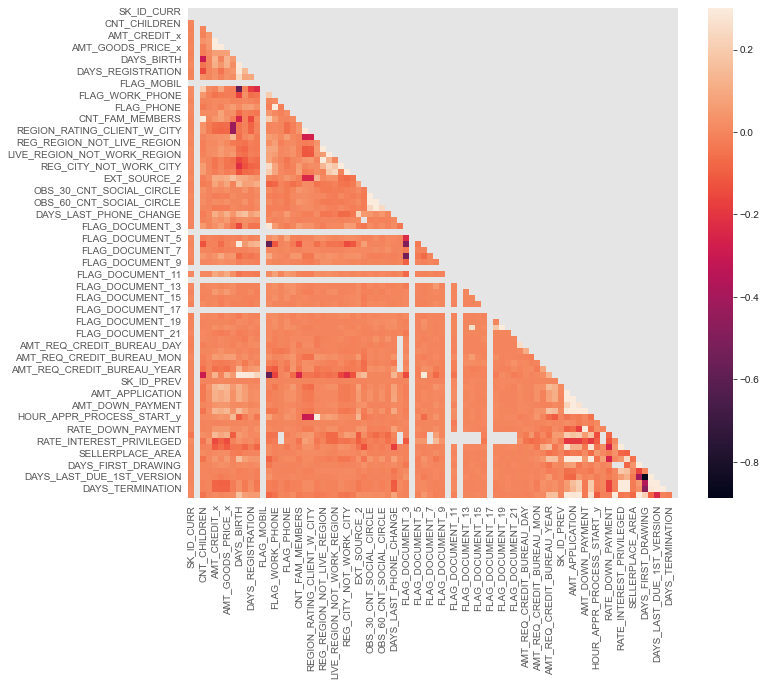

In [420]:
comcorr1 = combined_app_t1.corr()
msk = np.zeros_like(comcorr1)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(comcorr1, mask=msk, vmax=0.3, square=True)
    
    plt.show()

In [421]:
Com_corr_1 = combined_app_t1.corr().abs().unstack().sort_values().dropna()
Com_corr_1 = Com_corr_1[Com_corr_1 != 1.0]
Com_corr_1.tail(30)

AMT_ANNUITY_y                AMT_APPLICATION                0.824962
AMT_APPLICATION              AMT_ANNUITY_y                  0.824962
AMT_GOODS_PRICE_y            AMT_ANNUITY_y                  0.840196
AMT_ANNUITY_y                AMT_GOODS_PRICE_y              0.840196
AMT_CREDIT_y                 AMT_ANNUITY_y                  0.840461
AMT_ANNUITY_y                AMT_CREDIT_y                   0.840461
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.858281
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.858281
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.873130
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.873130
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.886300
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.886300
DAYS_FIRST_DRAWING           DAYS_LAST_DUE_1ST_VERSION      0.886465
DAYS_LAST_DUE_1ST_VERSION    DAYS_FIRST_DRAWING             0.886465
DAYS_LAST_DUE                DAYS_